# Fundamentals of machine learning, assignment #1

## Part 1: Data cleaning

In [3]:
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

Steps.csv file is differently encrypted, so separator is needed to make file readible. 

In [4]:
df1 = pd.read_csv('steps.csv', sep = ';')
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Priror to merging the dataframes, made a mean for the steps.

In [5]:
df1['mean_steps'] = df1.loc[:,'20-6-2013':'13-5-2014'].mean(axis=1).dropna()


In [29]:
dff1=df[['id', 'mean_steps']]

In [30]:
df2 = pd.read_csv('survey.csv')

In [31]:
print(dff1.shape, df2.shape)

(929, 2) (929, 9)


Since both files have the same number of rows, they can be merged (pandas) on shared varibale (column) - ID.

In [32]:
df = pd.merge(dff1, df2, on = 'id')
df.head()

,id,mean_steps,city,gender,age,hh_size,education,education_1,height,weight
0,1,10205.521212,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,5687.423313,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,8301.729730,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,3633.200000,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,5312.129630,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


Exploring the weight data; Found some impossible outliers: over 650kg and below 10kg.

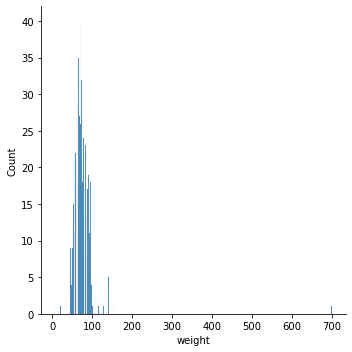

In [33]:
sns.displot(df['weight'], bins = 1000, kde = False)

In order to clean the data from unrealistic and impossible values, functions are created:

In [34]:
df['weight'] = df['weight'].apply(pd.to_numeric, errors='coerce')
def above_200kg(x):
    if(x>200.0):
        return float('NaN')
    else:
        return x
df['weight'] = df['weight'].apply(above_200kg)

def below_35kg(x):
    if(x<35.0):
        return float('NaN')
    else:
        return x
df['weight'] = df['weight'].apply(below_35kg)

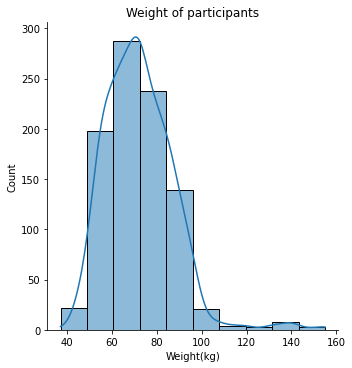

In [35]:
sns.displot(df['weight'], bins=10, kde = True)
plt.title('Weight of participants')
plt.xlabel('Weight(kg)')
plt.ylabel('Count')
plt.show()

Weight of participants is slighty rightly skewed, meaning that mean value is higher than median value.

<AxesSubplot:xlabel='mean_steps', ylabel='Count'>

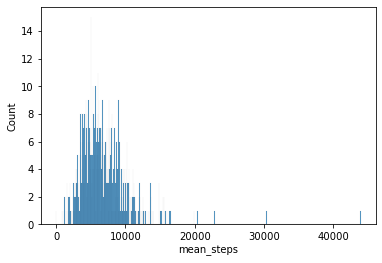

In [36]:
sns.histplot(df['mean_steps'], bins=1000)

In [37]:
def over_step(x):
    if (x>50000):
        return float('NaN')
    else:
        return x
df['mean_steps'] = df['mean_steps'].apply(over_step)

excluded impossible outlier of 200k steps.

<AxesSubplot:xlabel='mean_steps', ylabel='Count'>

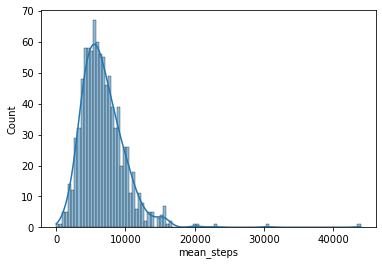

In [38]:
sns.histplot(df['mean_steps'].dropna(), bins=100, kde= True)


In [39]:
df['mean_steps'].describe()

count      923.000000
mean      6769.953148
std       3283.387189
min          4.000000
25%       4635.186275
50%       6244.857143
75%       8345.605771
max      43912.307692
Name: mean_steps, dtype: float64

Distirubition of mean steps per user of fitbit is slightly skewed right.

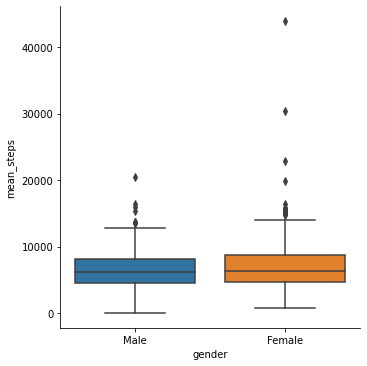

In [40]:
sns.catplot(x=df['gender'], y=df['mean_steps'], kind='box', data=df)

There is no big difference between genders in terms of average steps that were made daily. However, slightly more active were women, but that could also be since that group had more outliers which then pulled the mean higher as well. 

## Part 2 - correlation and featuring

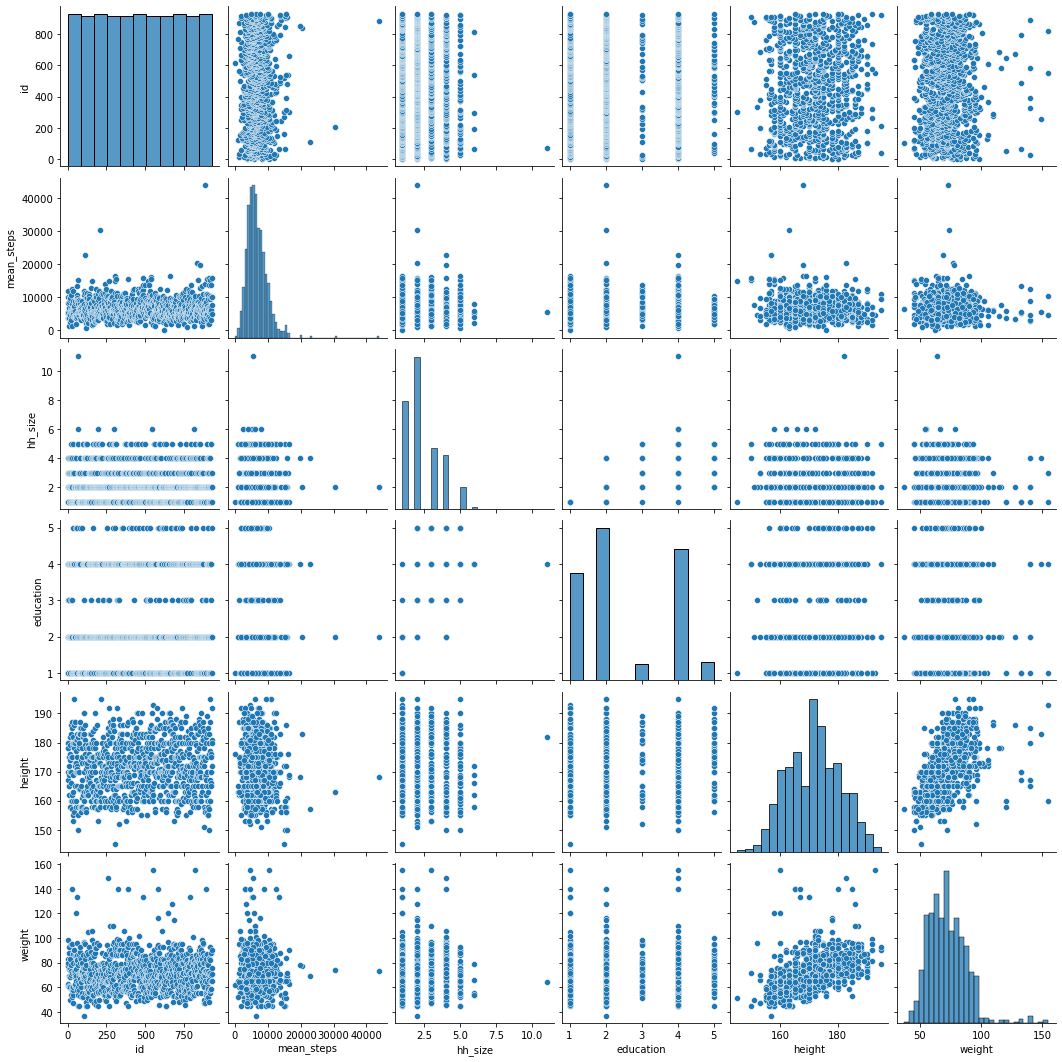

In [42]:
sns.pairplot(df)